In [7]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

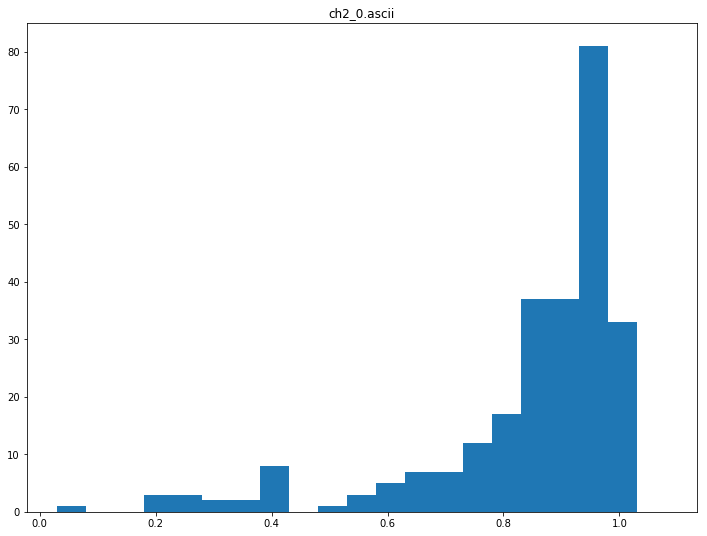

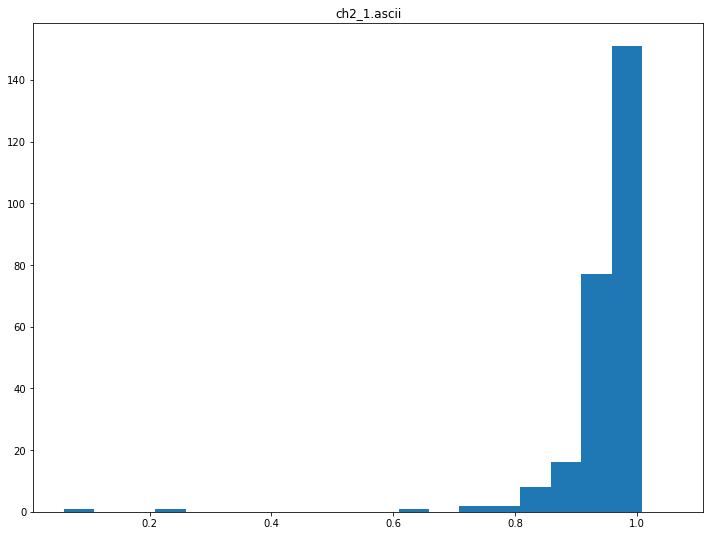

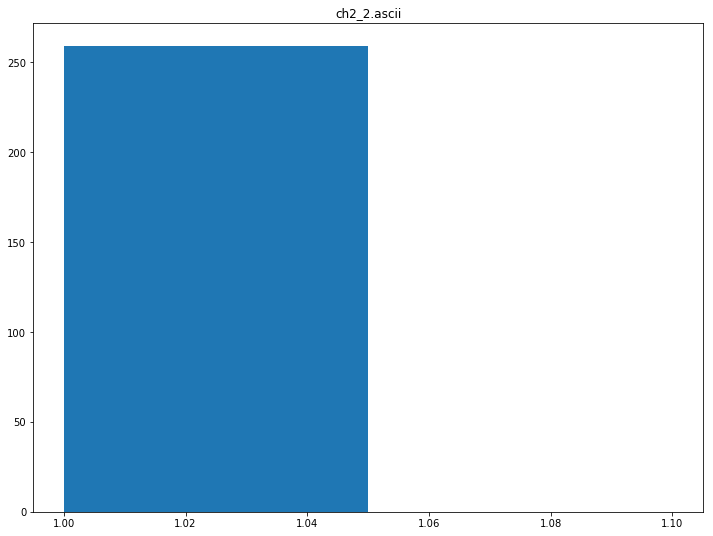

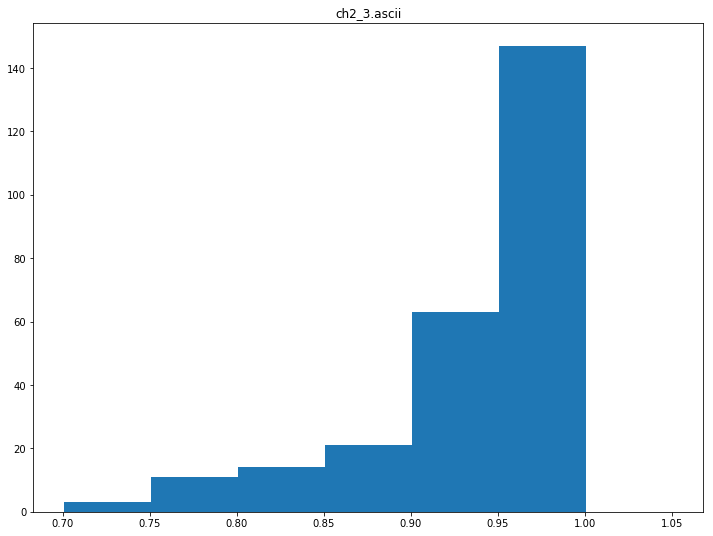

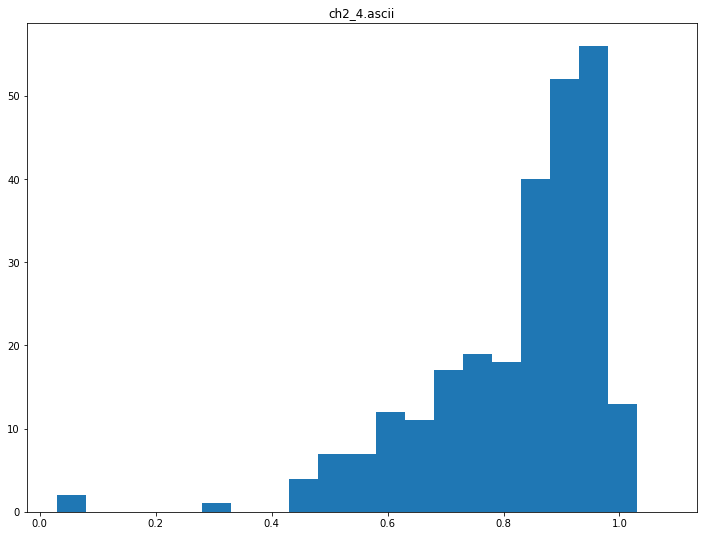

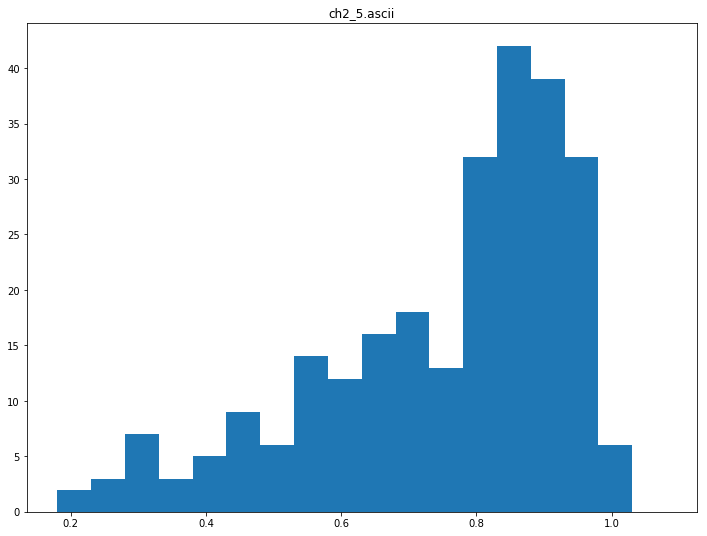

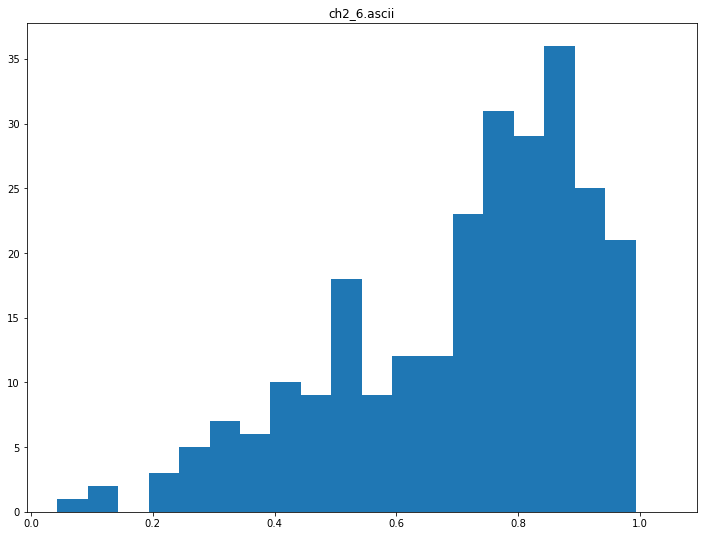

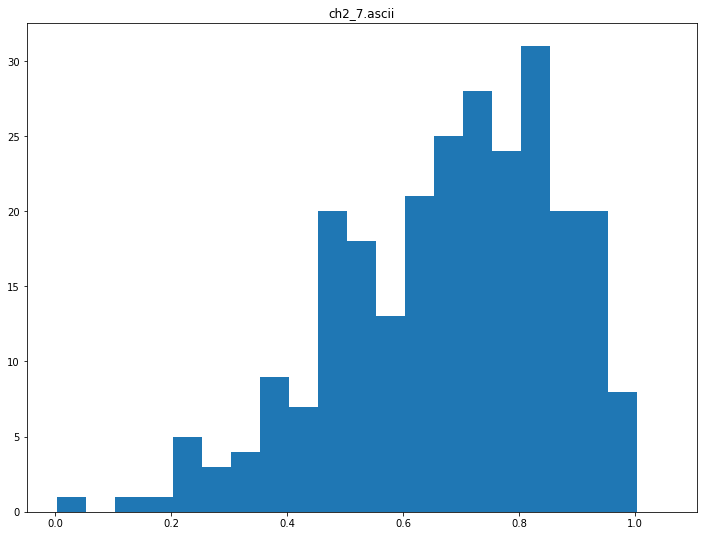

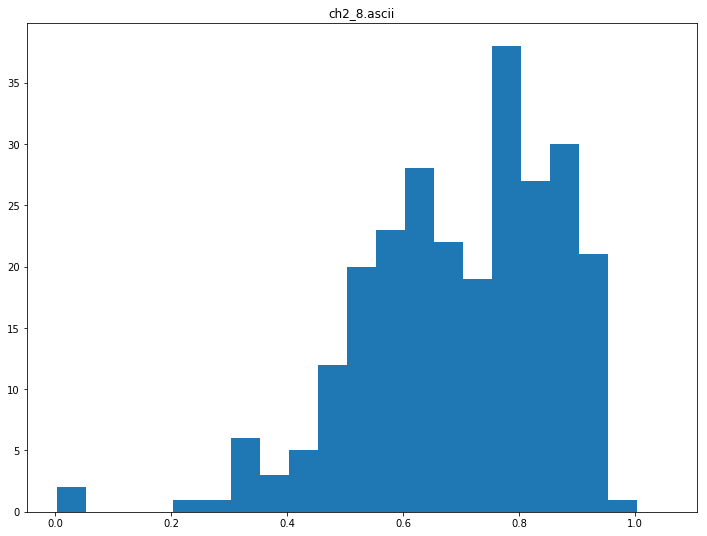

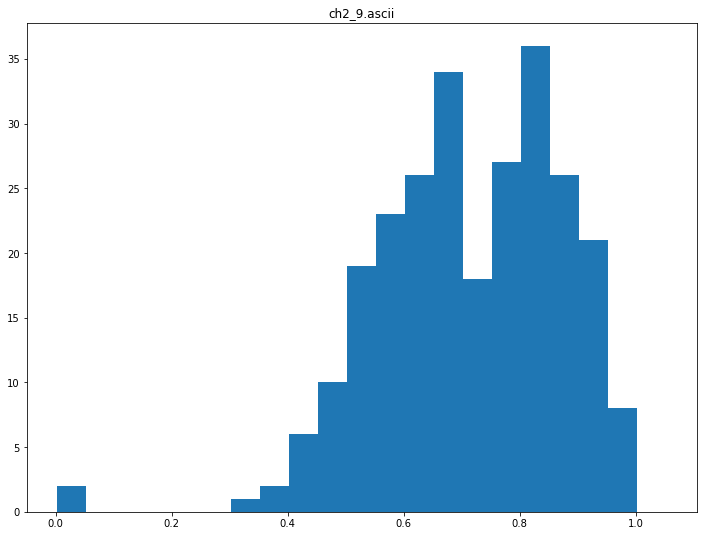

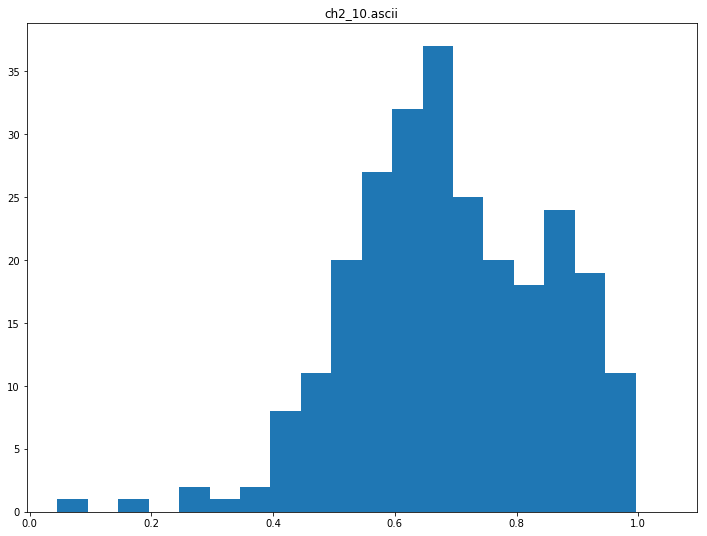

In [8]:
for i in range(11):
    fname = 'ch2_'+str(i)+'.ascii'
    fig = plt.figure(figsize=(12, 9))
    cor = np.loadtxt(fname)
    plt.hist(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    plt.title(fname)
    plt.show()

In [9]:
#Test 9th Oct 2006

start_date = datetime(2006,10,8,0,0,0);
end_date = datetime(2006,10,9,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

#Print cross-cor coef between channel 2 and all other channels.
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[61][signal])[:,2]
    ar2 = np.asarray(output_data[61][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  61
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns61/ns61_061008_v1.03.ascii
{0: array([ 0.88944714]), 1: array([ 0.94405454]), 2: array([ 1.]), 3: array([ 0.79083568]), 4: array([ 0.56071077]), 5: array([ 0.49762854]), 6: array([ 0.43660062]), 7: array([ 0.39856803]), 8: array([ 0.53662109]), 9: array([ 0.53561848]), 10: array([ 0.50741891])}


In [10]:
#To find porbability of a give X-correlation parameter to land in a given or lower bin.

xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)
#prints file name, cross-cor value and corresponding p-value

ch2_0.ascii [ 0.88944714] 0.56
ch2_1.ascii [ 0.94405454] 0.42
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.79083568] 0.05
ch2_4.ascii [ 0.56071077] 0.08
ch2_5.ascii [ 0.49762854] 0.14
ch2_6.ascii [ 0.43660062] 0.13
ch2_7.ascii [ 0.39856803] 0.09
ch2_8.ascii [ 0.53662109] 0.19
ch2_9.ascii [ 0.53561848] 0.15
ch2_10.ascii [ 0.50741891] 0.18


In [11]:
#Test 25th May 2009

start_date = datetime(2009,5,20,0,0,0);
end_date = datetime(2009,5,26,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

#Print cross-cor coef between channel 2 and all other channels.
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[61][signal])[:,2]
    ar2 = np.asarray(output_data[61][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  61
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns61/ns61_090524_v1.03.ascii
{0: array([ 0.09514254]), 1: array([ 0.43329325]), 2: array([ 1.]), 3: array([ 0.9373273]), 4: array([ 0.90066382]), 5: array([ 0.76217239]), 6: array([ 0.79334628]), 7: array([ 0.85280911]), 8: array([ 0.85427106]), 9: array([ 0.85950001]), 10: array([ 0.85631847])}


In [12]:
#To find porbability of a give X-correlation parameter to land in a given or lower bin.

xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)
#prints file name, cross-cor value and corresponding p-value

ch2_0.ascii [ 0.09514254] 0.00
ch2_1.ascii [ 0.43329325] 0.01
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.9373273] 0.43
ch2_4.ascii [ 0.90066382] 0.73
ch2_5.ascii [ 0.76217239] 0.42
ch2_6.ascii [ 0.79334628] 0.68
ch2_7.ascii [ 0.85280911] 0.81
ch2_8.ascii [ 0.85427106] 0.92
ch2_9.ascii [ 0.85950001] 0.89
ch2_10.ascii [ 0.85631847] 0.88


In [13]:
#Test 12th Feb 2013

start_date = datetime(2013,2,9,0,0,0);
end_date = datetime(2013,2,13,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

#Print cross-cor coef between channel 2 and all other channels.
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[61][signal])[:,2]
    ar2 = np.asarray(output_data[61][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  61
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns61/ns61_130210_v1.03.ascii
{0: array([ 0.73421463]), 1: array([ 0.96279262]), 2: array([ 1.]), 3: array([ 0.94707664]), 4: array([ 0.58608962]), 5: array([ 0.41818426]), 6: array([ 0.40069841]), 7: array([ 0.37414365]), 8: array([ 0.35454151]), 9: array([ 0.38248131]), 10: array([ 0.39150131])}


In [14]:
#To find porbability of a give X-correlation parameter to land in a given or lower bin.

xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)
#prints file name, cross-cor value and corresponding p-value

ch2_0.ascii [ 0.73421463] 0.21
ch2_1.ascii [ 0.96279262] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.94707664] 0.43
ch2_4.ascii [ 0.58608962] 0.13
ch2_5.ascii [ 0.41818426] 0.08
ch2_6.ascii [ 0.40069841] 0.13
ch2_7.ascii [ 0.37414365] 0.09
ch2_8.ascii [ 0.35454151] 0.05
ch2_9.ascii [ 0.38248131] 0.02
ch2_10.ascii [ 0.39150131] 0.03


In [15]:
#Test 6th Jan 2016

start_date = datetime(2016,1,2,0,0,0);
end_date = datetime(2016,1,7,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

#Print cross-cor coef between channel 2 and all other channels.
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[61][signal])[:,2]
    ar2 = np.asarray(output_data[61][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  61
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns61/ns61_160103_v1.03.ascii
{0: array([ 0.99035803]), 1: array([ 0.99686895]), 2: array([ 1.]), 3: array([ 0.98774069]), 4: array([ 0.96392042]), 5: array([ 0.94804208]), 6: array([ 0.93038992]), 7: array([ 0.91339356]), 8: array([ 0.92081967]), 9: array([ 0.93499828]), 10: array([ 0.92922228])}


In [16]:
#To find porbability of a give X-correlation parameter to land in a given or lower bin.

xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)
#prints file name, cross-cor value and corresponding p-value

ch2_0.ascii [ 0.99035803] 1.00
ch2_1.ascii [ 0.99686895] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.98774069] 1.00
ch2_4.ascii [ 0.96392042] 0.95
ch2_5.ascii [ 0.94804208] 0.98
ch2_6.ascii [ 0.93038992] 0.92
ch2_7.ascii [ 0.91339356] 0.97
ch2_8.ascii [ 0.92081967] 1.00
ch2_9.ascii [ 0.93499828] 0.97
ch2_10.ascii [ 0.92922228] 0.96


In [17]:
#Test 9th Sept 2016

start_date = datetime(2016,9,4,0,0,0);
end_date = datetime(2016,9,10,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);

#Print cross-cor coef between channel 2 and all other channels.
dcor = {}
signal = 'rate_electron_measured'
output_data = ms.get_all_data_by_satellite()
for i in range(11):
    a0 = np.asarray(output_data[61][signal])[:,2]
    ar2 = np.asarray(output_data[61][signal])[:,i]
    cor = np.correlate(a0, ar2)/(math.sqrt(np.sum(a0**2)*np.sum(ar2**2)))
    dcor.update({i:cor})
print dcor


Loading data for satellite  61
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns61/ns61_160904_v1.03.ascii
{0: array([ 0.99546249]), 1: array([ 0.9985847]), 2: array([ 1.]), 3: array([ 0.99634355]), 4: array([ 0.97710816]), 5: array([ 0.95594683]), 6: array([ 0.92476371]), 7: array([ 0.88829577]), 8: array([ 0.87824009]), 9: array([ 0.91789235]), 10: array([ 0.92121926])}


In [18]:
#To find porbability of a give X-correlation parameter to land in a given or lower bin.

xv = dcor.values()
for i in range(len(xv)):
    sum_bins_up_to = []
    fname = 'ch2_'+str(i)+'.ascii'
    cor = np.loadtxt(fname)
    sort = np.histogram(cor, bins = np.arange(min(cor), max(cor)+0.1, 0.05))
    for j in range(len(sort[1])):
        if sort[1][j] <= xv[i] <= sort[1][j+1]:
            for k in np.arange(j+1):
                sum_bins_up_to.append(sort[0][k])
            tot_sum_up_to = np.sum(sum_bins_up_to)
            pvalue = float(tot_sum_up_to)/float(np.sum(sort[0]))
            print fname, xv[i], '%.2f' % (pvalue)
#prints file name, cross-cor value and corresponding p-value

ch2_0.ascii [ 0.99546249] 1.00
ch2_1.ascii [ 0.9985847] 1.00
ch2_2.ascii [ 1.] 1.00
ch2_3.ascii [ 0.99634355] 1.00
ch2_4.ascii [ 0.97710816] 0.95
ch2_5.ascii [ 0.95594683] 0.98
ch2_6.ascii [ 0.92476371] 0.92
ch2_7.ascii [ 0.88829577] 0.89
ch2_8.ascii [ 0.87824009] 0.92
ch2_9.ascii [ 0.91789235] 0.97
ch2_10.ascii [ 0.92121926] 0.96
